# Heatmap of Global Temperature Anomaly

Global temperature anomaly (GTA, $^oC$) was downloaded from [NCDC](https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/3/1958-2018). The data come from the Global Historical Climatology Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere Data Set (ICOADS), which have data from 1880 to the present. These two datasets are blended into a single product to produce the combined global land and ocean temperature anomalies. The available time series of global-scale temperature anomalies are calculated with respect to the 20th-century average. 

The period from Jan/1958 to Mar/2018 was used in this notebook. The data are presented as Heatmap, which is a graphical representation of data where the individual values contained in a matrix are represented as colors. It is really useful to display a general view of numerical data, not to extract specific data point.

## 1. Load all needed libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import calendar

%matplotlib inline

matplotlib inline


## 2. Read global temperature anomaly

In [2]:
gta = pd.read_csv('data\gta_1958_2018.csv', 
                  sep=",", 
                  skiprows=5,
                  names = ["Month", "GTA"])
gta['Month'] = pd.to_datetime(gta['Month'], format='%Y%m', errors='ignore')
gta.set_index('Month', inplace=True)

### 2.1 Convert to Year * Months

In [3]:
gta = pd.pivot(gta.index.year, gta.index.month, gta['GTA']) \
            .rename(columns=calendar.month_name.__getitem__)
gta.index.name = None        
gta.head()

Month,January,February,March,April,May,June,July,August,September,October,November,December
1958,0.29,0.21,0.12,0.11,0.10,0.06,0.06,0.05,0.02,0.04,0.09,0.15
1959,0.12,0.06,0.20,0.12,0.02,0.08,0.07,0.05,0.09,-0.02,-0.08,-0.04
1960,0.00,0.18,-0.21,-0.10,-0.09,0.07,0.03,0.04,0.06,0.03,-0.05,0.22
1961,0.12,0.17,0.16,0.13,0.16,0.15,0.03,0.03,-0.01,-0.04,0.01,-0.02
1962,0.13,0.17,0.12,0.07,0.06,0.06,0.09,0.05,0.06,0.08,0.07,0.08


## 3. Visualize

### 3.1 Heatmap

In [4]:
def plot(returns,
         title="Global Temperature Anomaly ($^\circ$C)\n",
         title_color="black",
         title_size=14,
         annot_size=5,
         vmin = -1.0,
         vmax = 1.0,
         figsize=None,
         cmap='RdBu_r',
         cbar=True,
         square=False):

    if figsize is None:
        size = list(plt.gcf().get_size_inches())
        figsize = (size[0], size[0] // 2)
        plt.close()
 
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(returns, ax=ax, annot=False, vmin=vmin, vmax=vmax, center=0,
                     annot_kws={"size": annot_size},
                     fmt="0.2f", linewidths=0.5,
                     square=square, cbar=cbar, cbar_kws={'fraction':0.10},
                     cmap=cmap)
    ax.set_title(title, fontsize=title_size,
                 color=title_color, fontweight="bold")

    fig.subplots_adjust(hspace=0)
    plt.yticks(rotation=0)
    plt.show()

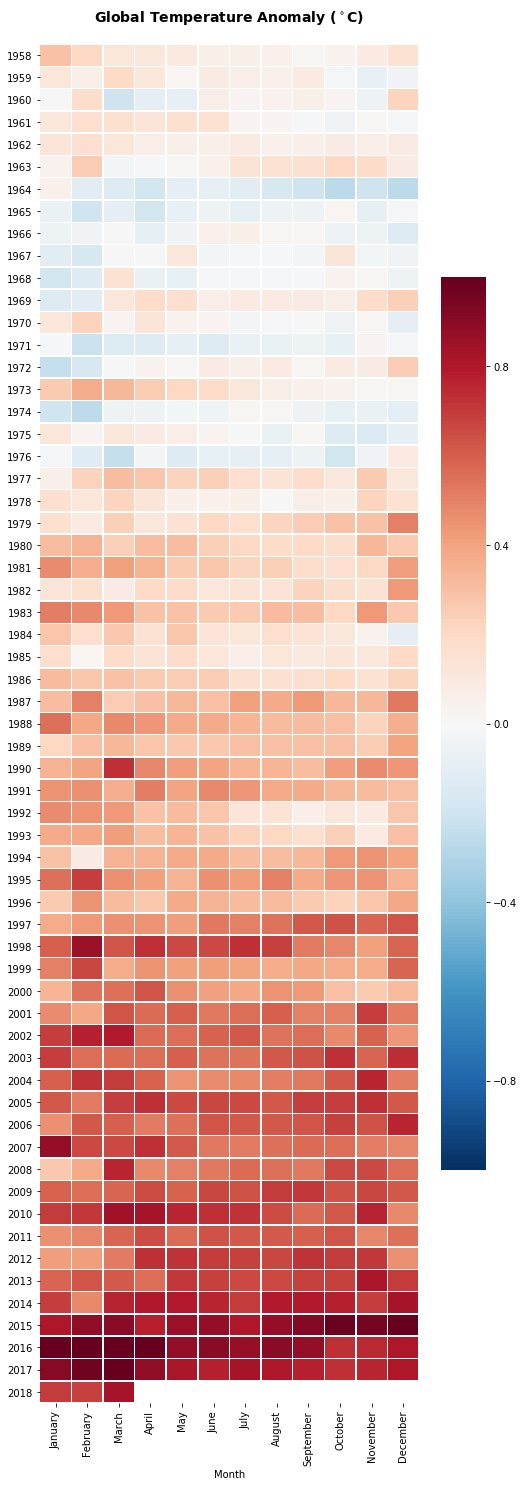

In [5]:
plot(gta, figsize=[8, 25])

### 3.2 Classic line plots

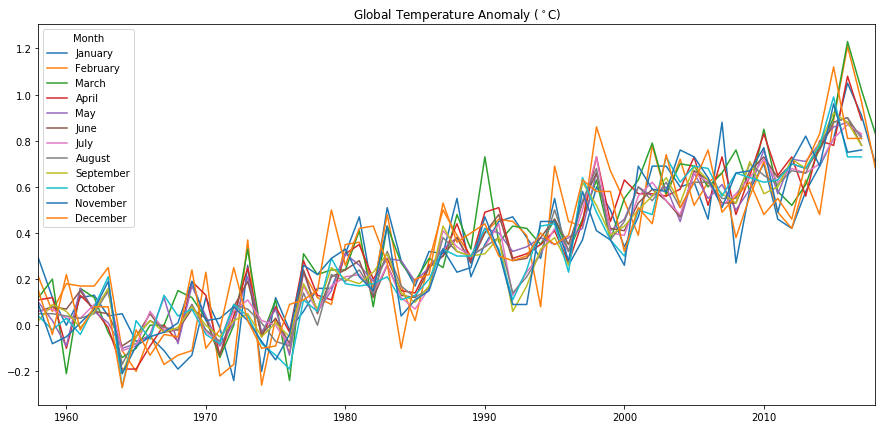

In [6]:
gta.plot(title="Global Temperature Anomaly ($^\circ$C)", figsize=[15, 7])

## Summary

The heatmap presents global temperature change in a visually appealing and straightforward way. The pace of change is immediately obvious, especially over the past few decades. However, it will become a little harder to check the heatmap when the data is getting longer and longer. At this time, an animation presentation seems more appealing and attractive. For example, Dr. Ed Hawkins’ global warming [spiral](http://www.climate-lab-book.ac.uk/2016/spiralling-global-temperatures/) shows the extent of global temperature increase from 1850 to the present.

Global temperature rising is expected to have far-reaching, long-lasting and, in many cases, devastating consequences for planet Earth. Recently, a new [research](http://www.iiasa.ac.at/web/home/about/news/180516-byers-temperature-rise.html#.Wv_uKnZgcjk.linkedin) identifying climate vulnerability hotspots has found that the number of people affected by multiple climate change risks could double if the global temperature rises by 2°C, compared to a rise of 1.5°C.

## References

NOAA National Centers for Environmental information, Climate at a Glance: Global Time Series, published May 2018, retrieved on May 20, 2018 from http://www.ncdc.noaa.gov/cag/

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)

https://seaborn.pydata.org/index.html